<a href="https://colab.research.google.com/github/devnac221990/ICP12-KDM/blob/main/TimeSeriesdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We build a multi-layer LSTM recurrent neural network to predict sequence of values. Here we use the tesla stock price.
We are building a time series model to predict future values based on previously observed values

We load the data and import the libraries.

In [ ]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


Using Yahoo finance the data can be obtained for free. Downloading and loading the tesla stock price data.

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/TSLA.csv")
print(df.shape)
df.head(5)

(1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


Splitting the data into training and testing set to avoid the overfitting

In [ ]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

Normalizing the data before fitting the model to boost the performance of the model. We use the minmaxscaler()

In [ ]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

We build a sequential model here the LSTM model, with 50 neurons and 4 hidden layers. 1 neuron in the output layer is assigned for predicting the normalized stock pprice. The MSE loss function is used and adam SGD optimizer.

In [ ]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
24/24 [==============================] - 36s 18ms/step - loss: 0.1355
Epoch 2/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0152
Epoch 3/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0128
Epoch 4/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0152
Epoch 5/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0097
Epoch 6/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0117
Epoch 7/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0107
Epoch 8/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0131
Epoch 9/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0106
Epoch 10/100
24/24 [==============================] - 0s 17ms/step - loss: 0.0100
Epoch 11/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0103
Epoch 12/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0098
Epoch 13/100
24/24 [====

Now we prepare the test data to reshape them

In [ ]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In this step we make the predictions using the test set

In [ ]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Visualization of the results

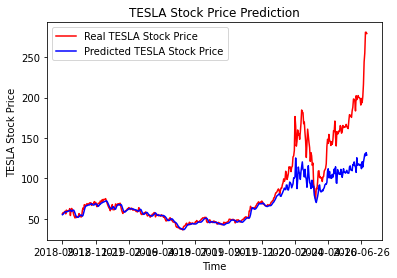

In [ ]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()